<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8(%EC%8B%A4%EC%8A%B5%EC%9A%A901)_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 머신러닝(Machine Learning) 모델 적용

## 03 분류 모델 적용

#### 1 이진 분류 모델(로지스틱 회귀 모델)

##### 가. 입력 변수가 1개(시험->합/부)

In [ ]:
# 데이터: x(입력), y(정답)
import numpy as np               # 배열 연산 라이브러리
x = np.array([[74],[81],[94],[68],[64],[70],[83],[94],[71],[74]]) #시험점수
y = np.array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1])  # 1: 합격, 0: 불합격

# 모델 선정하기
from sklearn.linear_model import LogisticRegression  #로지스틱회귀 라이브러리
log_reg = LogisticRegression(solver='lbfgs')  # 모델 생성

# 학습하기
model = log_reg.fit(x, y)

In [ ]:
# 학습 결과(w, b) 확인
w = model.coef_
b = model.intercept_
print("w=", w, "b=", b)

w= [[1.02741042]] b= [-74.30001409]


In [ ]:
# 로지스틱 회귀 모델
def H(x):
  return 1/(1+np.exp(-(x*w+b)))

# 훈련데이터(x) 에 대한 모델의 예측
y_pred = np.where(H(x) > 0.5 , 1,0)  # 0.5보다 크면 1 아니면 0

# 모델 그래프 데이터 준비
x_in = np.arange(x.min(),x.max(),0.5)
Hx = H(x_in).reshape(-1,1)

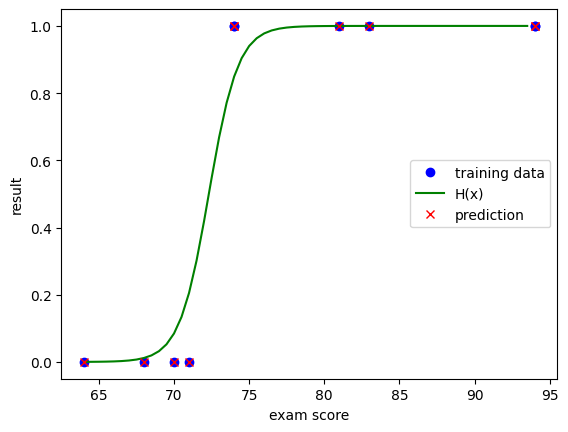

In [ ]:
# 그래프로 모델과 실제 데이터 비교하기
import matplotlib.pyplot as plt               # 데이터 시각화
plt.plot(x, y, 'bo', label='training data')       # 훈련 데이터셋
plt.plot(x_in, Hx, 'g', label='H(x)')         # H(x)
plt.plot(x, y_pred,'rx', label='prediction')  # 회귀모델의 예측
plt.xlabel("exam score"), plt.ylabel("result")
plt.legend(loc='right')
plt.show()

In [ ]:
# 예측하기
x_new = np.array([[72],[73]])
print("H(x)  =     ", H(x_new))
print("예측 결과 = ", model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측

H(x)  =      [[0.41910132]
 [0.66839765]]
예측 결과 =  [0 1]


In [ ]:
print(np.shape(x), np.shape(w))

(10, 1) (1, 1)


##### 나. 입력 변수가 2개(시험,면접->합/부)

In [ ]:
#배열 처리 및 수치 계산 라이브러리 numpy
import numpy as np

#입력 데이터: 입력 특성 2개, 데이터셋 10개
X = np.array([[74, 68 ],  # 지원자1
     [81, 83 ],  # 지원자2
     [78, 80 ],  # 지원자3
     [80, 71 ],  # 지원자4
     [75, 75 ],  # 지원자5
     [70, 70 ],  # 지원자6
     [83, 77 ],  # 지원자7
     [74, 86 ],  # 지원자8
     [71, 76 ],  # 지원자9
     [74, 64 ]])  # 지원자10

y = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0]) # y(1)~y(10)

#feature_names = ['시험', '면접']
#target_name = '결과'

In [ ]:
#라이브러리
import numpy as np               # 연산
import matplotlib.pyplot as plt  # 데이터 시각화

# 모델 선정하기
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')  # 추정기(로지스틱 회귀)

# 학습하기
model = log_reg.fit(X, y)

# 학습 결과(w, b) 확인
W = model.coef_
b = model.intercept_
print("w=", W, "b=", b)

def H(x):
  return 1/(1+np.exp(-(X*W+b)))

pred = np.where(H(X) > 0.5 , 1,0)
# x_in = np.arange(X.min(),X.max(),0.5)
# H = H(x_in)
# print(x_in.shape, H.shape)

w= [[0.88565688 0.40926277]] b= [-98.2537524]


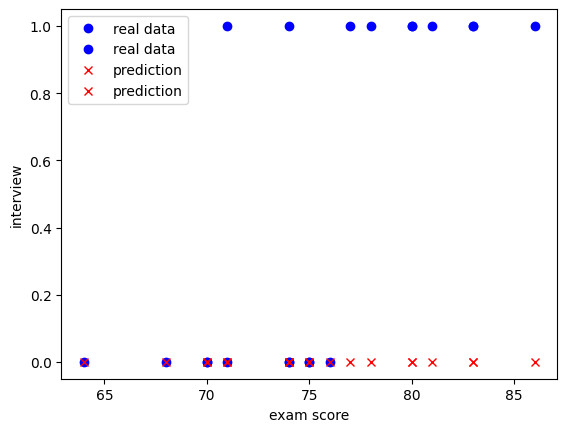

In [ ]:
# 그래프로 모델과 실제 데이터 비교하기
plt.plot(X, y, 'bo', label='real data')      # 훈련 데이터셋
# plt.plot(x_in, H, 'g', label='H(x)')             # H(x)
plt.plot(X, pred,'rx', label='prediction')   # 회귀모델의 예측
plt.xlabel("exam score"), plt.ylabel("interview")

plt.legend()
plt.show()

(10, 2) (10,)


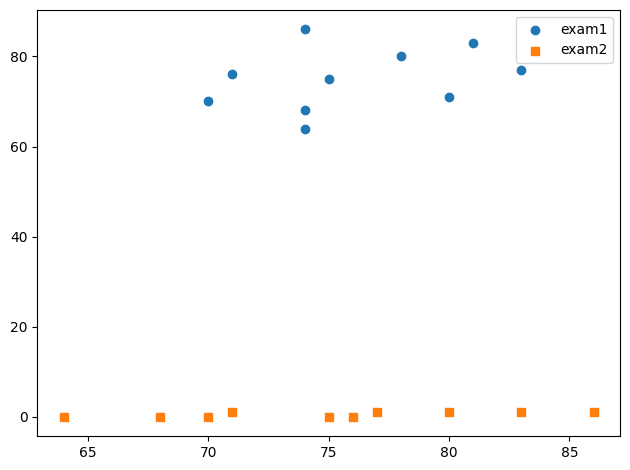

In [ ]:
print(np.shape(X), np.shape(y))
plt.scatter(X[:,0],X[:,1], marker='o', label = 'exam1')
plt.scatter(X[:,1],y, marker='s', label = 'exam2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# 예측하기
x_new = np.array([[74, 80],[80, 74]])
#print(model.predict(x_new))      # 새로운 입력 데이터에 대한 출력 데이터 예측